<a href="https://colab.research.google.com/github/sol-ops/gpt3-leukemia-information-assistant/blob/main/leukemia_detection_by_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
import tensorflow


In [4]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train'
vlid_path='/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/validation'

In [7]:
xception=Xception(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

83683744/83683744 [==============================] - 4s 0us/step


In [8]:
for layer in xception.layers:
  layer.trainable=False

In [9]:
folders=glob('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/*')

In [10]:
folders

['/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/leukumized',
 '/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train/normal']

In [11]:
x=Flatten()(xception.output)

In [12]:
prediction=Dense(len(folders),activation='softmax')(x)

In [13]:
model=Model(inputs=xception.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [14]:
model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)




In [16]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/train',target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 260 images belonging to 2 classes.


In [17]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/combined data/data2(ALL-IDB2 TIFF file type)/test',
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical')

Found 26 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-18-b4b2878d2ea9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
17/17 [==============================] - 116s 6s/step - loss: 3.1393 - accuracy: 0.6115 - val_loss: 1.5120 - val_accuracy: 0.7308
Epoch 2/10
17/17 [==============================] - 74s 4s/step - loss: 0.9472 - accuracy: 0.8346 - val_loss: 0.6190 - val_accuracy: 0.8846
Epoch 3/10
17/17 [==============================] - 74s 4s/step - loss: 0.8034 - accuracy: 0.8346 - val_loss: 0.6601 - val_accuracy: 0.8846
Epoch 4/10
17/17 [==============================] - 71s 4s/step - loss: 0.3682 - accuracy: 0.9385 - val_loss: 0.1711 - val_accuracy: 0.9231
Epoch 5/10
17/17 [==============================] - 74s 4s/step - loss: 0.2794 - accuracy: 0.9423 - val_loss: 0.2266 - val_accuracy: 0.8846
Epoch 6/10
17/17 [==============================] - 74s 4s/step - loss: 0.1554 - accuracy: 0.9346 - val_loss: 0.1831 - val_accuracy: 0.9615
Epoch 7/10
17/17 [==============================] - 74s 4s/step - loss: 0.1729 - accuracy: 0.9462 - val_loss: 0.3064 - val_accuracy: 0.9231
Epoch 8/10
17/17 [=

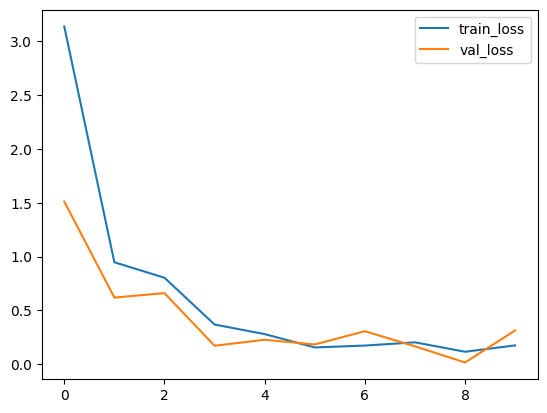

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


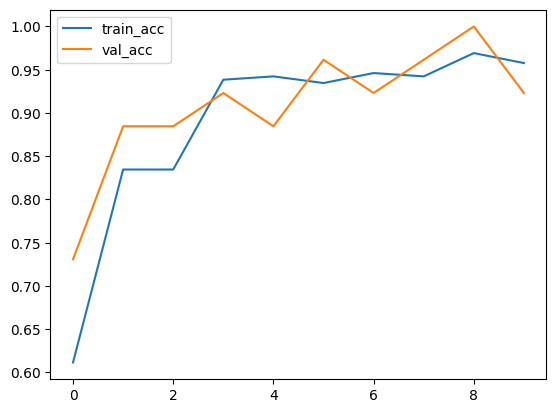

TypeError: ignored

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig()